In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [5]:
train=pd.DataFrame(pd.read_csv('gcTrianingSet.csv'))
train2=pd.DataFrame(pd.read_csv('gcTrianingSet.csv'))
prediction=pd.DataFrame(pd.read_csv('gcPredictionFile.csv'))

In [6]:
train.head

<bound method NDFrame.head of       initialUsedMemory  initialFreeMemory query token  gcRun  \
0              4.249634           2.999878     token_1  False   
1              4.409720           2.839792     token_2  False   
2              4.482361           2.767151     token_3  False   
3              4.542626           2.706886     token_4  False   
4              4.616296           2.633216     token_5  False   
5              4.787174           2.462337     token_6  False   
6              4.902623           2.346889     token_7  False   
7              4.977155           2.272357     token_8   True   
8              4.171586           3.077926     token_9  False   
9              4.523625           2.725887    token_10  False   
10             4.621179           2.628333    token_11  False   
11             4.720848           2.528664    token_12  False   
12             4.861294           2.388217    token_13  False   
13             4.919907           2.329605    token_14  Fals

In [7]:
train.keys()

Index(['initialUsedMemory', 'initialFreeMemory', 'query token', 'gcRun',
       'gcInitialMemory', 'gcFinalMemory', 'gcTotalMemory', 'userTime',
       'sysTime', 'realTime', 'cpuTimeTaken', 'finalUsedMemory',
       'finalFreeMemory'],
      dtype='object')

In [8]:
train.shape

(2730, 13)

In [9]:
train.describe()

,initialUsedMemory,initialFreeMemory,gcInitialMemory,gcFinalMemory,gcTotalMemory,userTime,sysTime,realTime,cpuTimeTaken,finalUsedMemory,finalFreeMemory
count,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000,2730.000000
mean,5.775503,1.921919,0.415684,0.291495,0.479192,0.018359,0.000535,0.002755,0.186569,5.775588,1.921990
std,0.801402,0.726219,1.619302,1.132280,1.855206,0.111837,0.007700,0.016707,0.128994,0.802645,0.728086
min,4.129662,0.330214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001052,4.117682,0.330214
25%,5.143413,1.338731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.112348,5.137244,1.337994
50%,5.758096,1.961032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141588,5.758960,1.959821
75%,6.418293,2.484630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230622,6.419282,2.484630
max,7.520346,3.728506,7.583425,5.281528,8.037598,2.410000,0.260000,0.350000,0.906536,7.520346,3.749075


In [10]:
np.sum(train['gcInitialMemory']==0)

2559

In [11]:
features=list(train.keys())

In [12]:
featuresPlot=list(train.keys())

In [13]:
featuresPlot.remove('query token')

In [14]:
features

['initialUsedMemory',
 'initialFreeMemory',
 'query token',
 'gcRun',
 'gcInitialMemory',
 'gcFinalMemory',
 'gcTotalMemory',
 'userTime',
 'sysTime',
 'realTime',
 'cpuTimeTaken',
 'finalUsedMemory',
 'finalFreeMemory']

In [15]:
featuresPlot

['initialUsedMemory',
 'initialFreeMemory',
 'gcRun',
 'gcInitialMemory',
 'gcFinalMemory',
 'gcTotalMemory',
 'userTime',
 'sysTime',
 'realTime',
 'cpuTimeTaken',
 'finalUsedMemory',
 'finalFreeMemory']

In [16]:
train['query token']

0        token_1
1        token_2
2        token_3
3        token_4
4        token_5
5        token_6
6        token_7
7        token_8
8        token_9
9       token_10
10      token_11
11      token_12
12      token_13
13      token_14
14      token_15
15      token_16
16      token_17
17      token_18
18      token_19
19      token_20
20      token_21
21      token_22
22      token_23
23      token_24
24      token_25
25      token_26
26      token_27
27      token_28
28      token_29
29      token_30
          ...   
2700    token_57
2701    token_87
2702    token_10
2703    token_71
2704    token_82
2705     token_5
2706    token_23
2707    token_18
2708    token_41
2709     token_7
2710    token_48
2711    token_15
2712    token_56
2713    token_60
2714    token_65
2715    token_19
2716    token_49
2717    token_80
2718    token_75
2719    token_67
2720    token_63
2721    token_89
2722    token_47
2723    token_59
2724    token_83
2725    token_38
2726     token_2
2727    token_

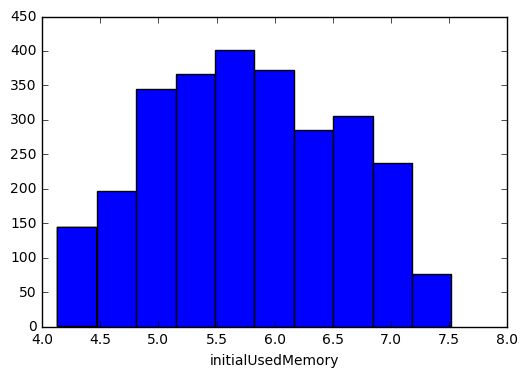

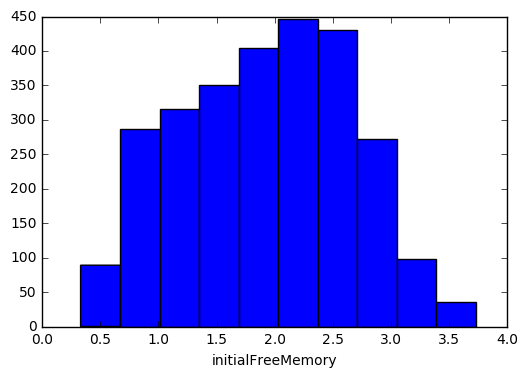

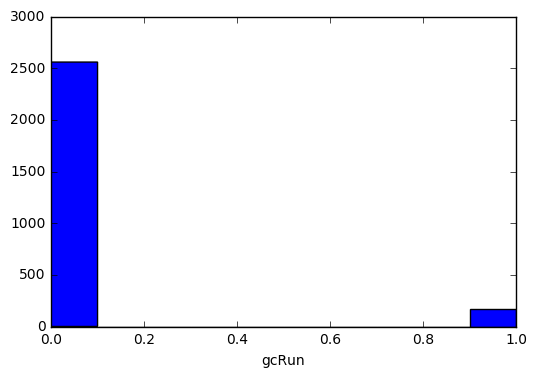

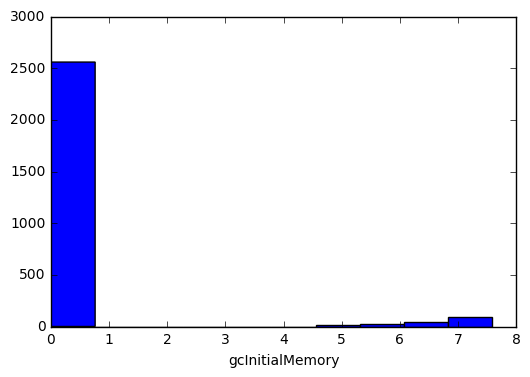

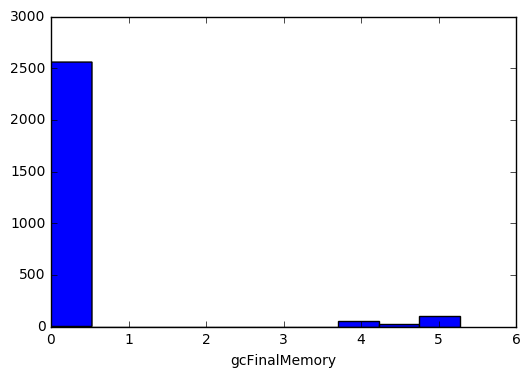

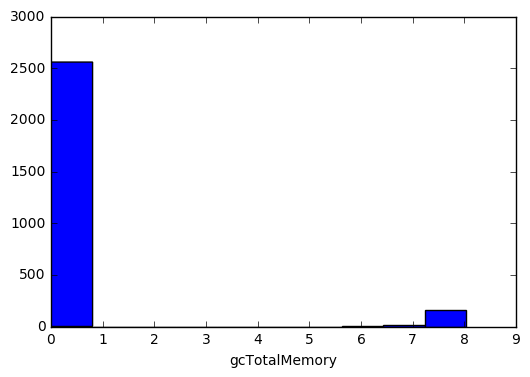

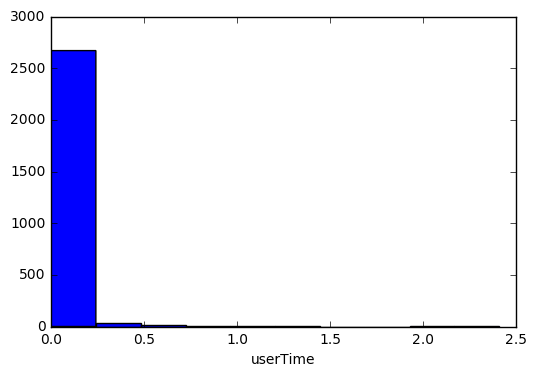

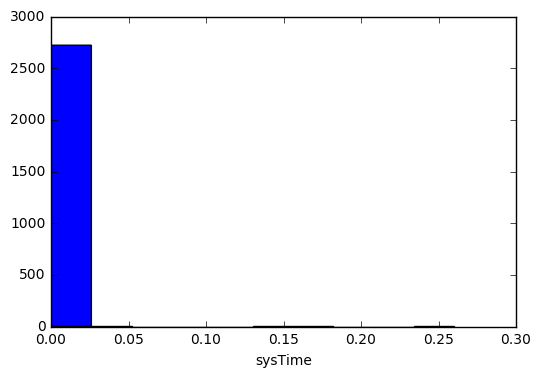

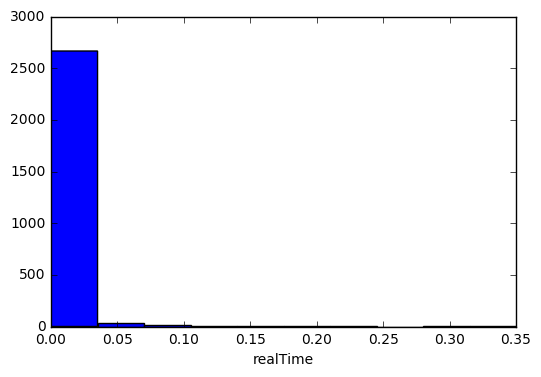

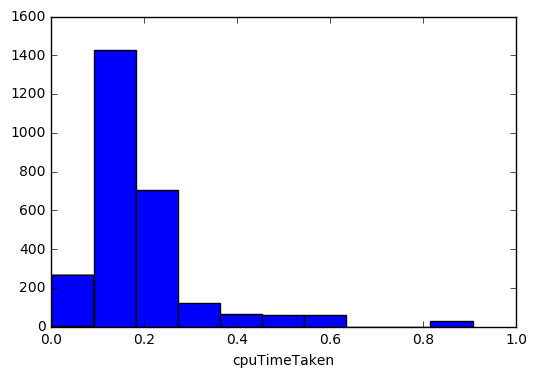

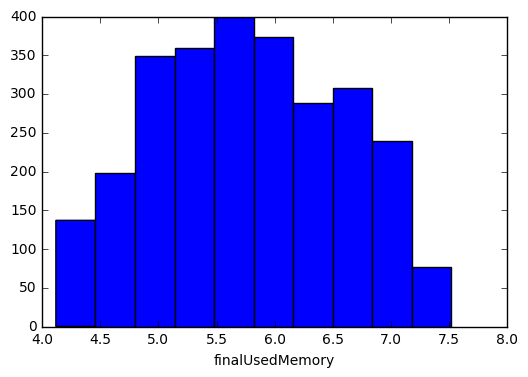

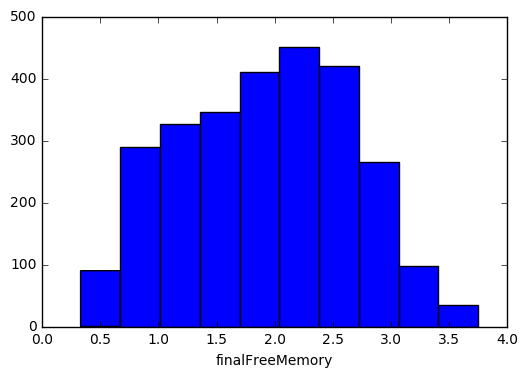

In [17]:
for i in featuresPlot:
    plt.hist(train[i])
    plt.xlabel(i)
    plt.show()

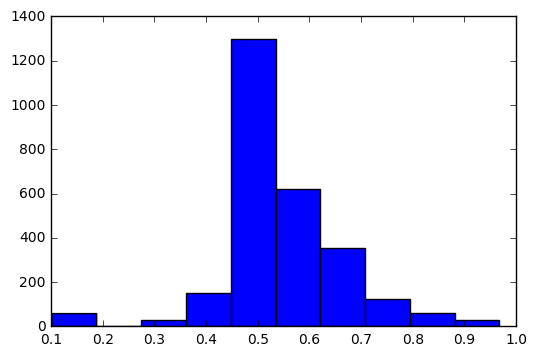

In [18]:
plt.hist(np.cbrt(train['cpuTimeTaken']))
plt.show()

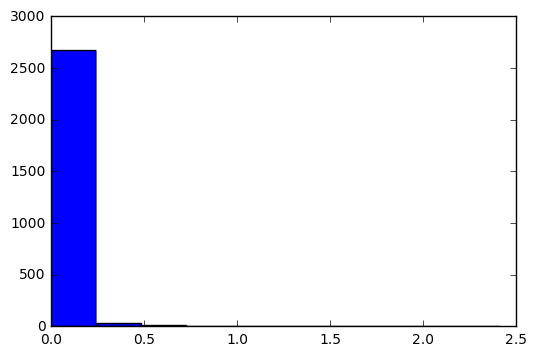

In [19]:
plt.hist(np.power(train['userTime'],1))
plt.show()

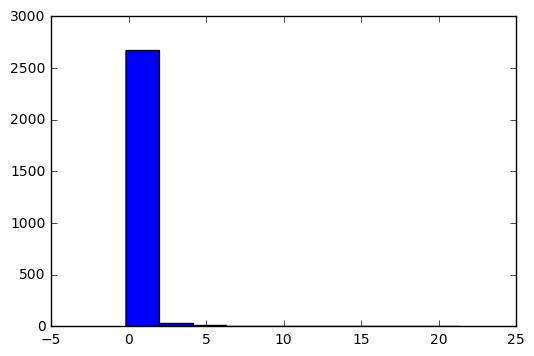

In [20]:
plt.hist( (train['userTime']-np.mean(train['userTime']))/np.std(train['userTime']) )
plt.show()

In [21]:
np.mean((train['userTime']-np.mean(train['userTime']))/np.std(train['userTime']))

4.255854927729767e-17

In [22]:
np.max(train['finalFreeMemory']+train['finalUsedMemory'])

8.037597657000001

In [23]:
train['initialFreeMemory']+train['initialUsedMemory']

0       7.249512
1       7.249512
2       7.249512
3       7.249512
4       7.249512
5       7.249512
6       7.249512
7       7.249512
8       7.249512
9       7.249512
10      7.249512
11      7.249512
12      7.249512
13      7.249512
14      7.249512
15      7.249512
16      7.249512
17      7.249512
18      7.249512
19      7.249512
20      7.249512
21      7.249512
22      7.249512
23      7.249512
24      7.249512
25      7.249512
26      7.249512
27      7.249512
28      7.249512
29      7.249512
          ...   
2700    7.606934
2701    7.606934
2702    7.606934
2703    7.606934
2704    7.606934
2705    7.606934
2706    7.606934
2707    7.606934
2708    7.606934
2709    7.606934
2710    7.606934
2711    7.606934
2712    7.606934
2713    7.606934
2714    7.606934
2715    7.606934
2716    7.694824
2717    7.694824
2718    7.694824
2719    7.694824
2720    7.694824
2721    7.694824
2722    7.694824
2723    7.694824
2724    7.694824
2725    7.694824
2726    7.694824
2727    7.6948

In [24]:
train['gcFinalMemory']-train['gcInitialMemory']+train['gcFinalMemory']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000000
7       3.229382
8       0.000000
9       0.000000
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      3.153842
15      0.000000
16      0.000000
17      0.000000
18      0.000000
19      0.000000
20      0.000000
21      0.000000
22      3.148411
23      0.000000
24      0.000000
25      0.000000
26      0.000000
27      0.000000
28      0.000000
29      3.121025
          ...   
2700    0.000000
2701    0.000000
2702    0.000000
2703    0.000000
2704    0.000000
2705    0.000000
2706    0.000000
2707    0.000000
2708    0.000000
2709    0.000000
2710    0.000000
2711    0.000000
2712    0.000000
2713    0.000000
2714    0.000000
2715    2.837273
2716    0.000000
2717    0.000000
2718    0.000000
2719    0.000000
2720    0.000000
2721    0.000000
2722    0.000000
2723    0.000000
2724    0.000000
2725    0.000000
2726    0.000000
2727    0.0000

In [25]:
np.sum[]

SyntaxError: invalid syntax (<ipython-input-25-9b96202f5421>, line 1)

In [26]:
train['gcTotalMemory'].unique()

array([ 0.        ,  7.24951172,  7.23291016,  6.29931641,  7.23339844,
        7.22607422,  7.15380859,  7.20800781,  7.14160156,  7.1875    ,
        7.22998047,  7.29003906,  7.30517578,  7.35888672,  7.45117188,
        7.48925781,  7.5078125 ,  7.54980469,  7.55810547,  7.59277344,
        7.63671875,  7.64697266,  7.67285156,  7.67382812,  7.67578125,
        7.69238281,  7.69677734,  7.72607422,  7.76953125,  7.77832031,
        7.80175781,  7.82519531,  7.83154297,  7.86181641,  7.88623047,
        7.90234375,  7.91455078,  7.62451172,  7.55126953,  7.80615234,
        7.46142578,  7.33544922,  7.4140625 ,  7.21484375,  7.27148438,
        7.12402344,  7.26953125,  7.34179688,  7.37207031,  7.42089844,
        7.44628906,  7.48242188,  7.57226562,  7.56738281,  7.58740234,
        7.609375  ,  7.64599609,  7.66064453,  7.71777344,  7.72021484,
        7.57470703,  7.68017578,  7.70556641,  7.72363281,  7.72998047,
        7.73388672,  7.77050781,  7.71191406,  7.7578125 ,  7.71

In [27]:
train['gcInitialMemory']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000000
7       5.055250
8       0.000000
9       0.000000
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      5.120831
15      0.000000
16      0.000000
17      0.000000
18      0.000000
19      0.000000
20      0.000000
21      0.000000
22      5.115852
23      0.000000
24      0.000000
25      0.000000
26      0.000000
27      0.000000
28      0.000000
29      5.110647
          ...   
2700    0.000000
2701    0.000000
2702    0.000000
2703    0.000000
2704    0.000000
2705    0.000000
2706    0.000000
2707    0.000000
2708    0.000000
2709    0.000000
2710    0.000000
2711    0.000000
2712    0.000000
2713    0.000000
2714    0.000000
2715    7.299377
2716    0.000000
2717    0.000000
2718    0.000000
2719    0.000000
2720    0.000000
2721    0.000000
2722    0.000000
2723    0.000000
2724    0.000000
2725    0.000000
2726    0.000000
2727    0.0000

In [28]:
train['query token'].unique()

array(['token_1', 'token_2', 'token_3', 'token_4', 'token_5', 'token_6',
       'token_7', 'token_8', 'token_9', 'token_10', 'token_11', 'token_12',
       'token_13', 'token_14', 'token_15', 'token_16', 'token_17',
       'token_18', 'token_19', 'token_20', 'token_21', 'token_22',
       'token_23', 'token_24', 'token_25', 'token_26', 'token_27',
       'token_28', 'token_29', 'token_30', 'token_31', 'token_32',
       'token_33', 'token_34', 'token_35', 'token_36', 'token_37',
       'token_38', 'token_39', 'token_40', 'token_41', 'token_42',
       'token_43', 'token_44', 'token_45', 'token_46', 'token_47',
       'token_48', 'token_49', 'token_50', 'token_51', 'token_52',
       'token_53', 'token_54', 'token_55', 'token_56', 'token_57',
       'token_58', 'token_59', 'token_60', 'token_61', 'token_62',
       'token_63', 'token_64', 'token_65', 'token_66', 'token_67',
       'token_68', 'token_69', 'token_70', 'token_71', 'token_72',
       'token_73', 'token_74', 'token_75', 'tok

In [29]:
train2=train

In [30]:
train2.insert(0,'queryno',train['query token'].str.split('_').str[1])

In [31]:
train.keys()==train2.keys()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True], dtype=bool)

In [32]:
train2.keys()

Index(['queryno', 'initialUsedMemory', 'initialFreeMemory', 'query token',
       'gcRun', 'gcInitialMemory', 'gcFinalMemory', 'gcTotalMemory',
       'userTime', 'sysTime', 'realTime', 'cpuTimeTaken', 'finalUsedMemory',
       'finalFreeMemory'],
      dtype='object')

In [33]:
train2.insert(0,'queryno',train2['query token'].str.split('_').str[1])

ValueError: cannot insert queryno, already exists

In [34]:
train2.keys()

Index(['queryno', 'initialUsedMemory', 'initialFreeMemory', 'query token',
       'gcRun', 'gcInitialMemory', 'gcFinalMemory', 'gcTotalMemory',
       'userTime', 'sysTime', 'realTime', 'cpuTimeTaken', 'finalUsedMemory',
       'finalFreeMemory'],
      dtype='object')

In [35]:
queryToken =train2.pop('query token')

In [36]:
train2.keys()

Index(['queryno', 'initialUsedMemory', 'initialFreeMemory', 'gcRun',
       'gcInitialMemory', 'gcFinalMemory', 'gcTotalMemory', 'userTime',
       'sysTime', 'realTime', 'cpuTimeTaken', 'finalUsedMemory',
       'finalFreeMemory'],
      dtype='object')

In [37]:
gc=train2[train2['gcRun']==True]

In [38]:
np.sum(gc['gcInitialMemory']==0)

0

In [39]:
len(featuresPlot)

12

In [40]:
len(gc.keys())

13

In [41]:
featuresPlot2=featuresPlot

In [42]:
featuresPlot2.append("queryno")

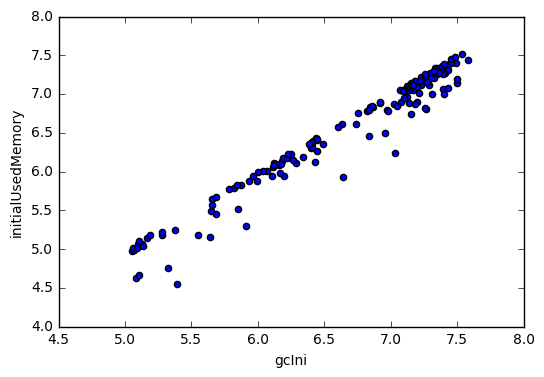

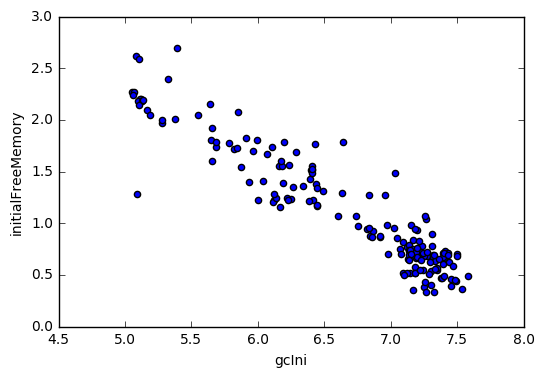

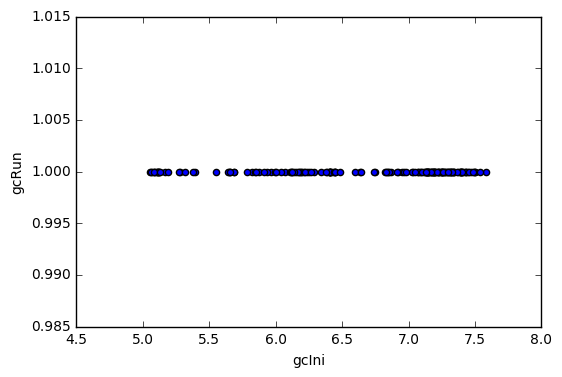

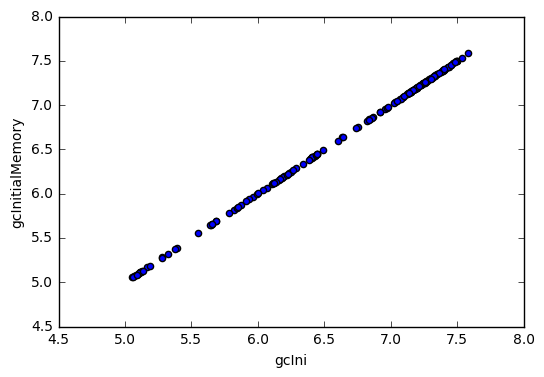

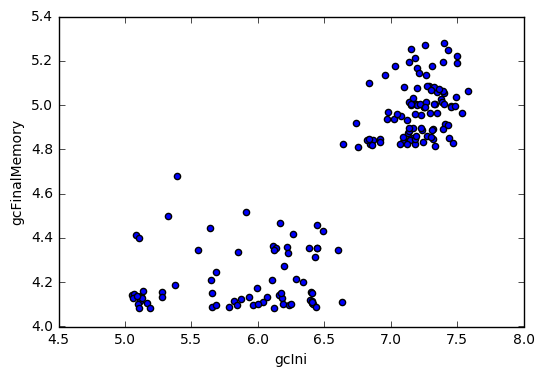

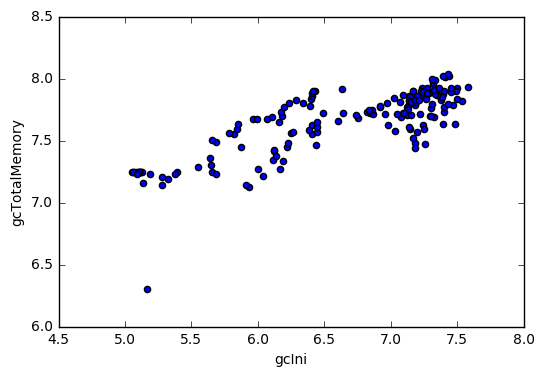

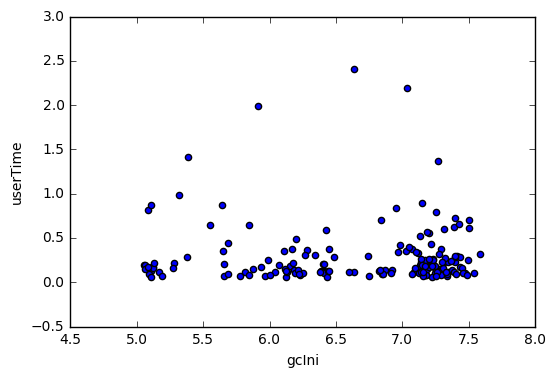

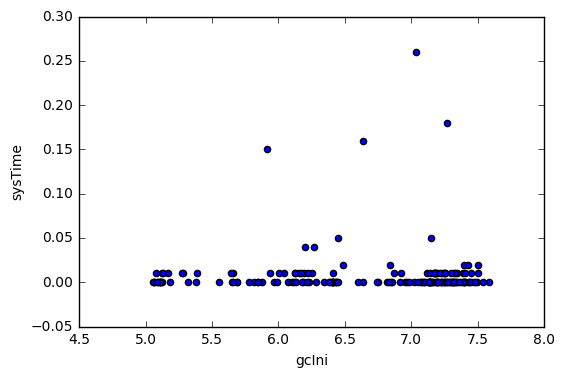

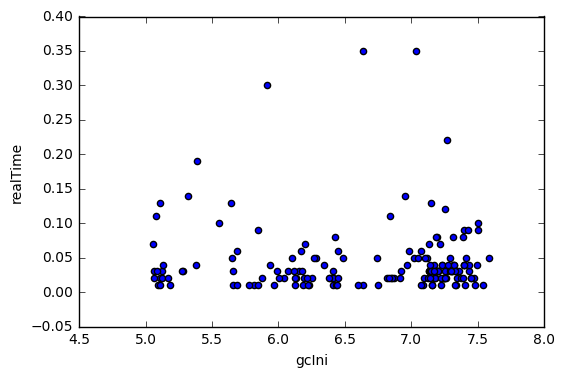

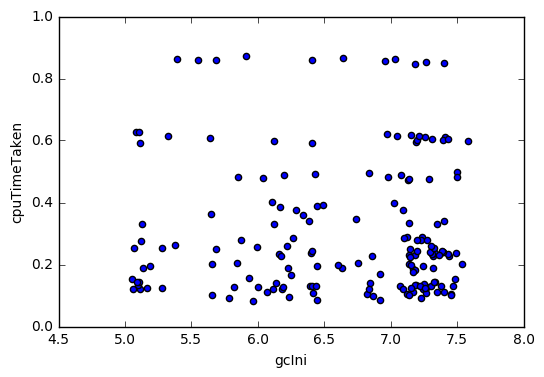

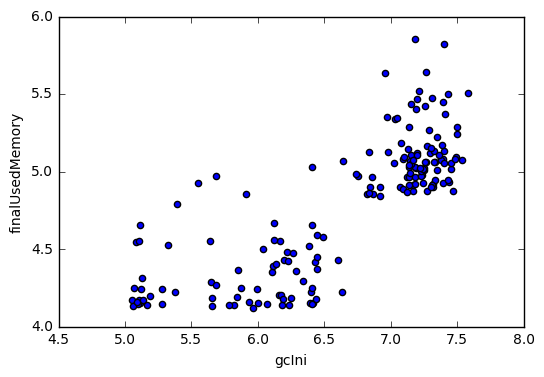

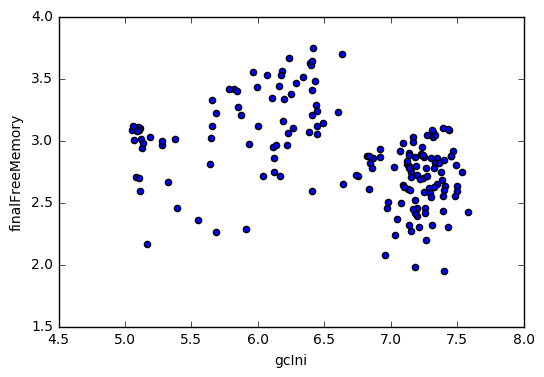

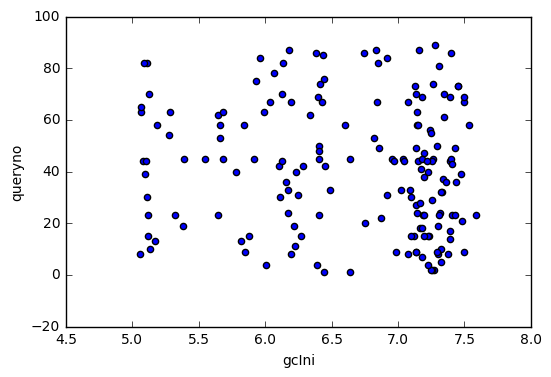

In [43]:
for i in featuresPlot2:
    plt.scatter(gc['gcInitialMemory'],gc[i])
    plt.xlabel('gcIni')
    plt.ylabel(i)
    plt.show()

In [44]:
featuresPlot2

['initialUsedMemory',
 'initialFreeMemory',
 'gcRun',
 'gcInitialMemory',
 'gcFinalMemory',
 'gcTotalMemory',
 'userTime',
 'sysTime',
 'realTime',
 'cpuTimeTaken',
 'finalUsedMemory',
 'finalFreeMemory',
 'queryno']

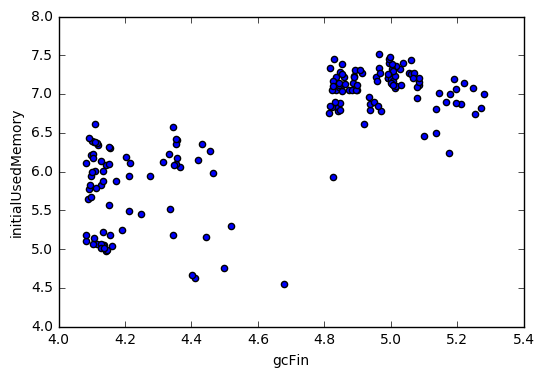

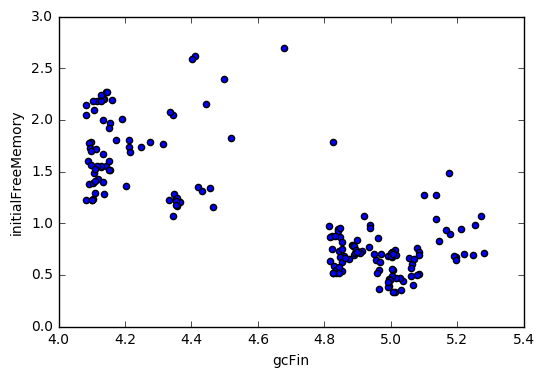

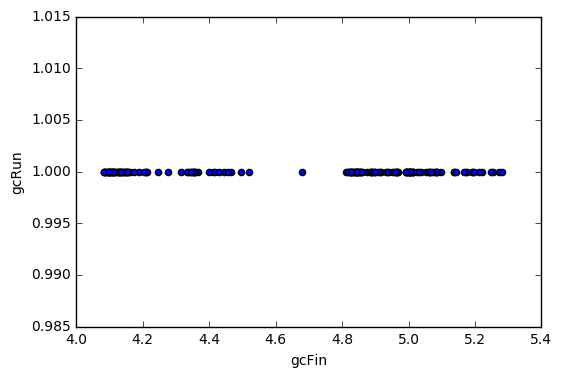

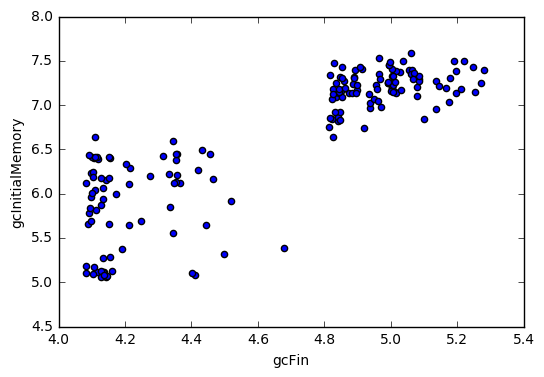

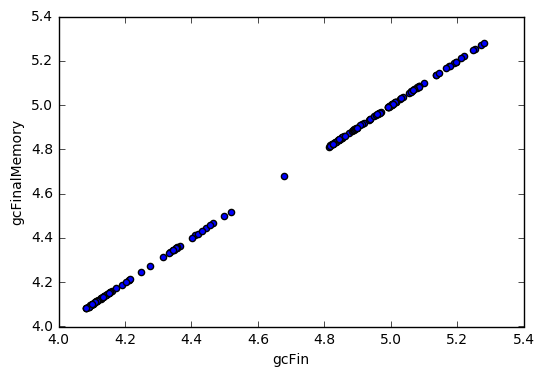

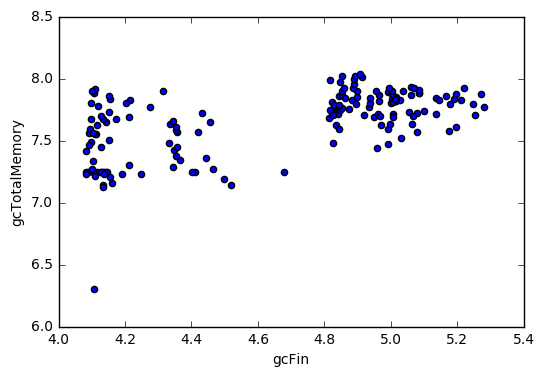

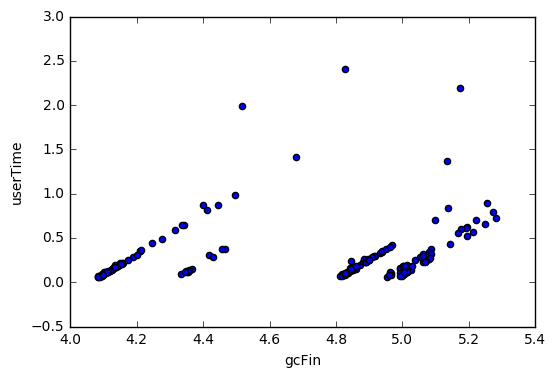

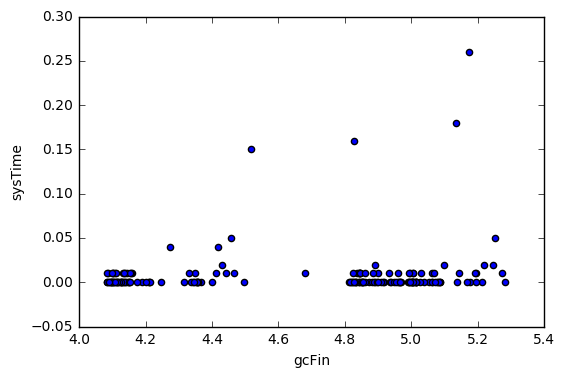

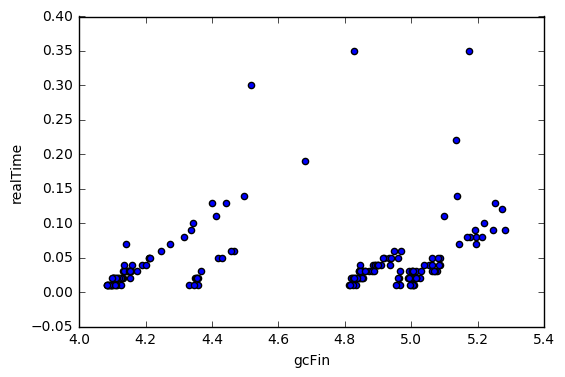

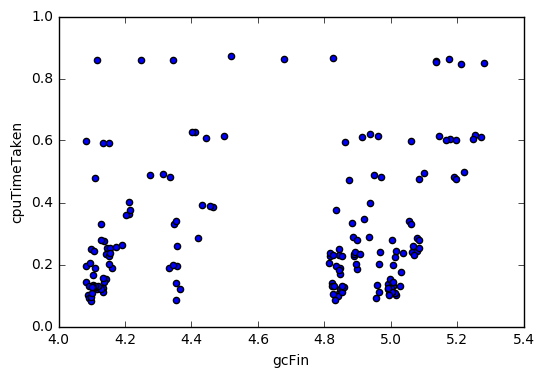

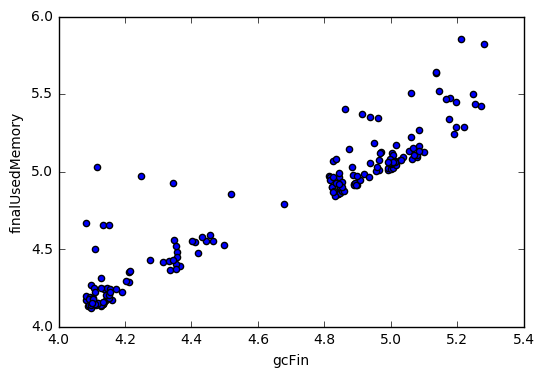

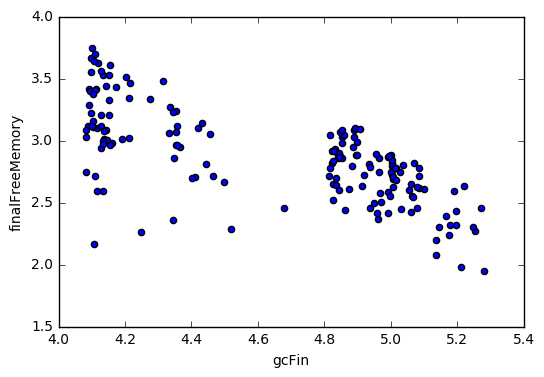

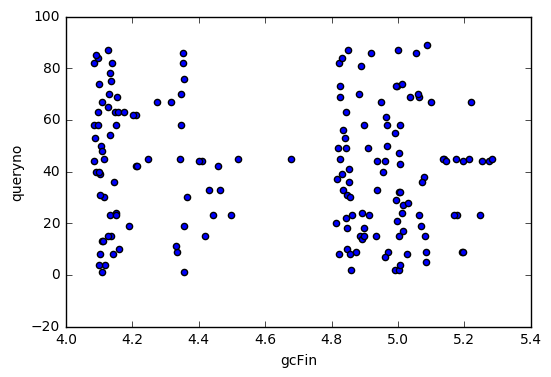

In [45]:
for i in featuresPlot2:
    plt.scatter(gc['gcFinalMemory'],gc[i])
    plt.xlabel('gcFin')
    plt.ylabel(i)
    plt.show()

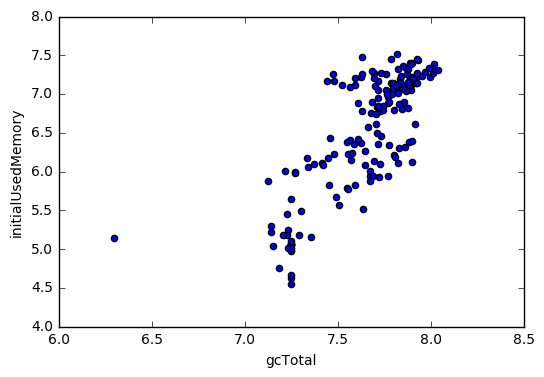

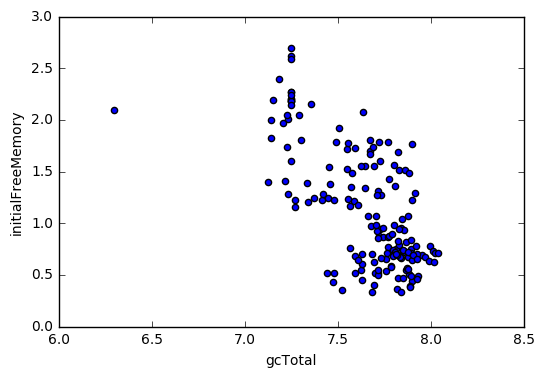

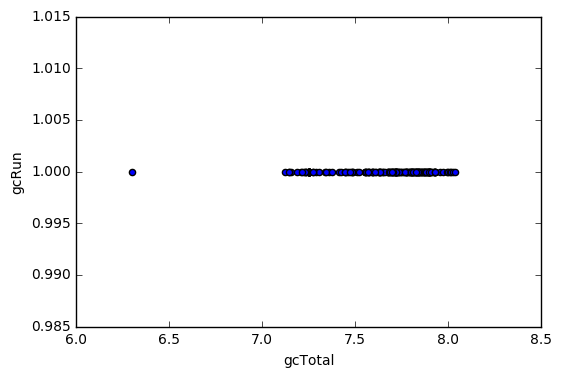

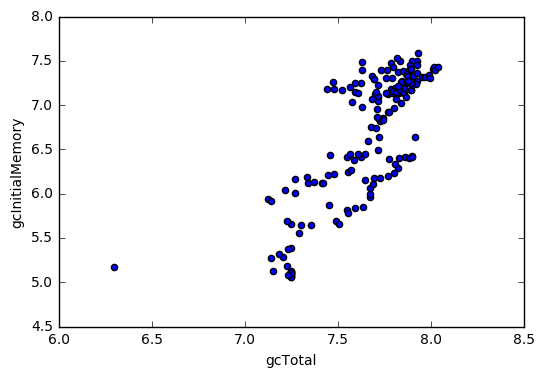

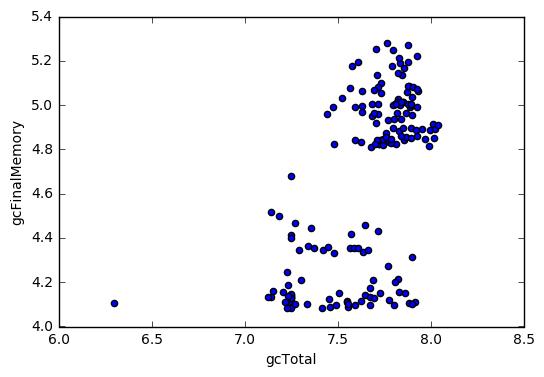

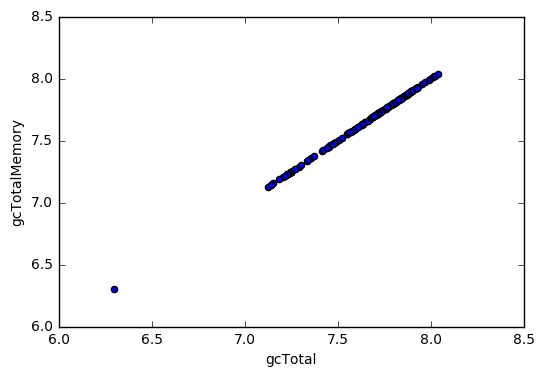

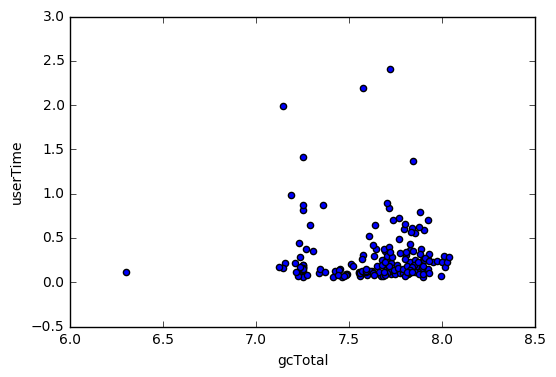

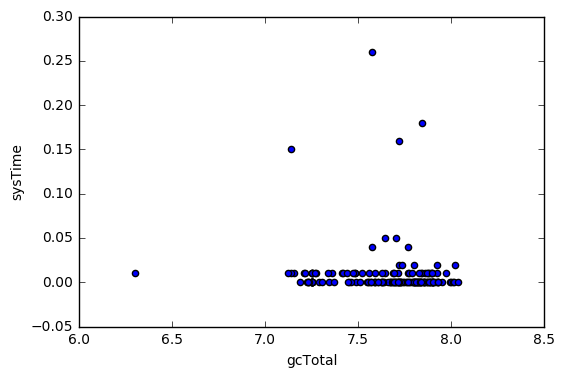

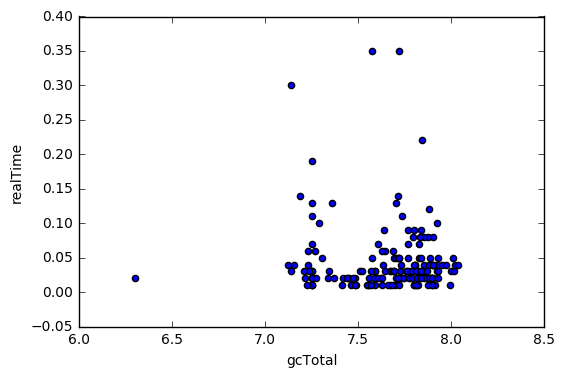

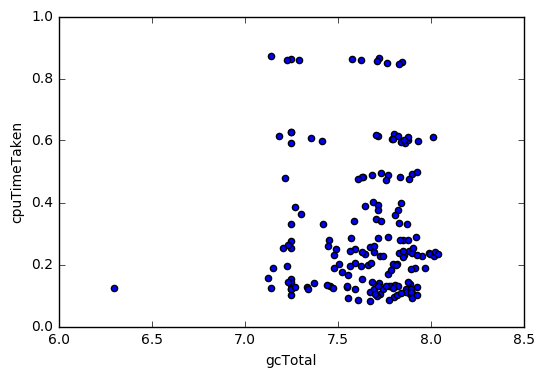

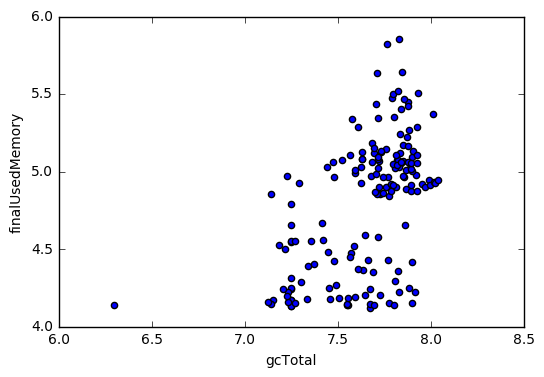

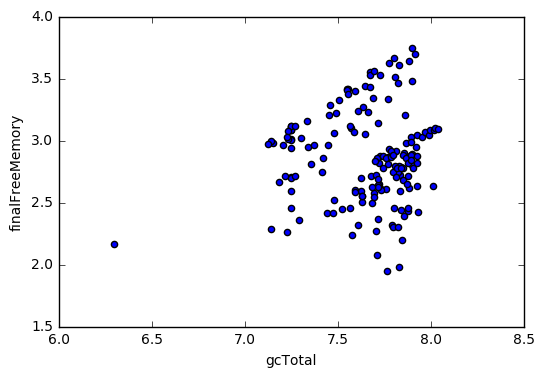

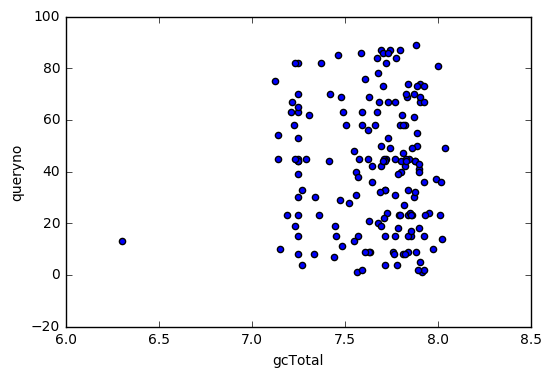

In [46]:
for i in featuresPlot2:
    plt.scatter(gc['gcTotalMemory'],gc[i])
    plt.xlabel('gcTotal')
    plt.ylabel(i)
    plt.show()

In [49]:
gc=gc[gc['gcTotalMemory']>6.5]

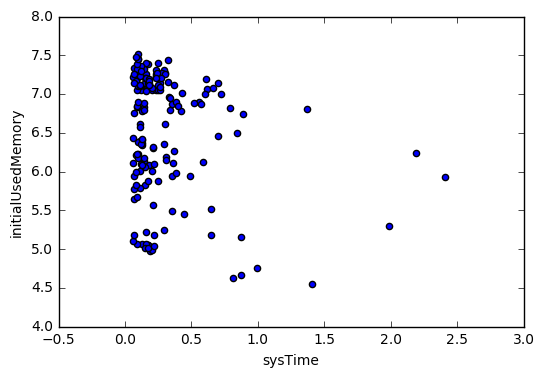

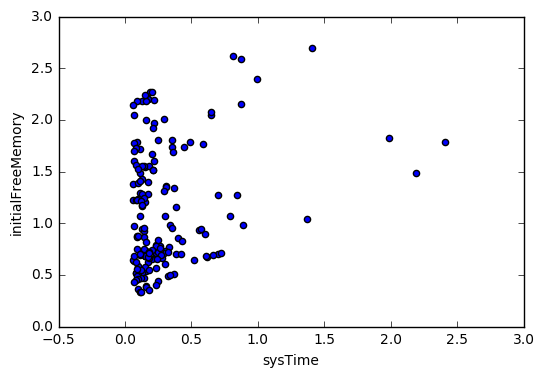

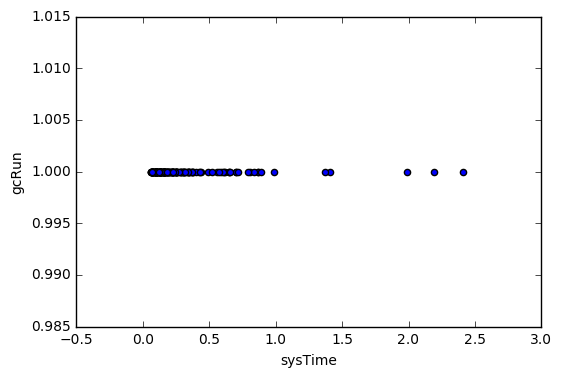

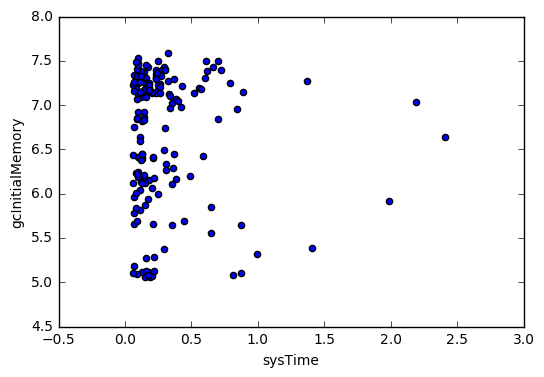

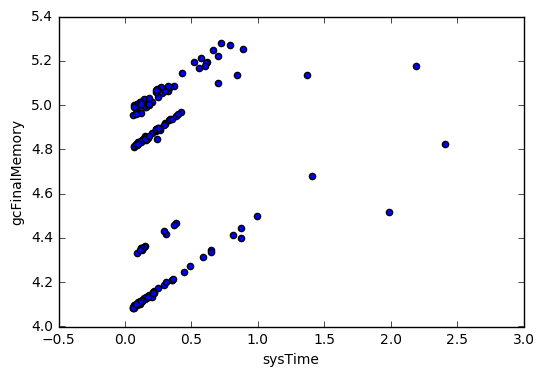

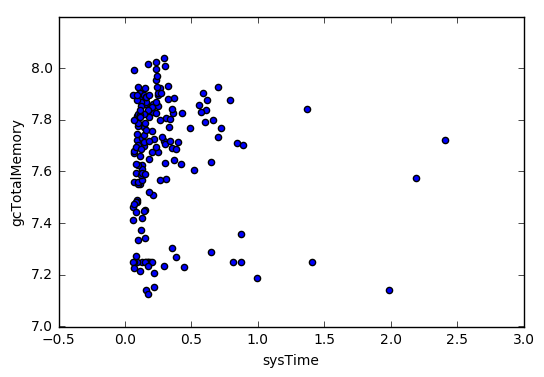

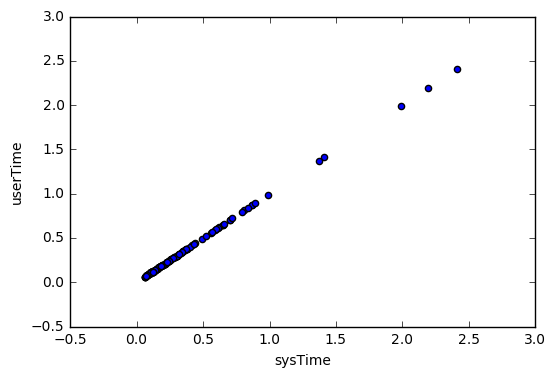

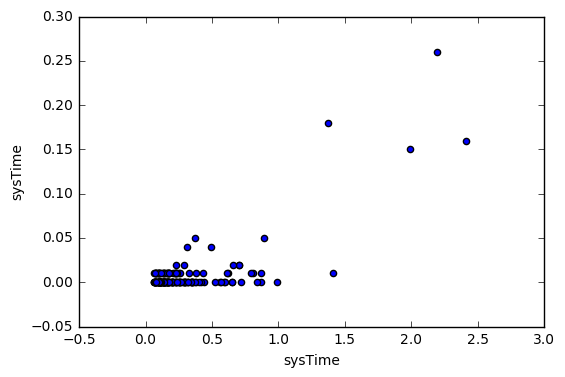

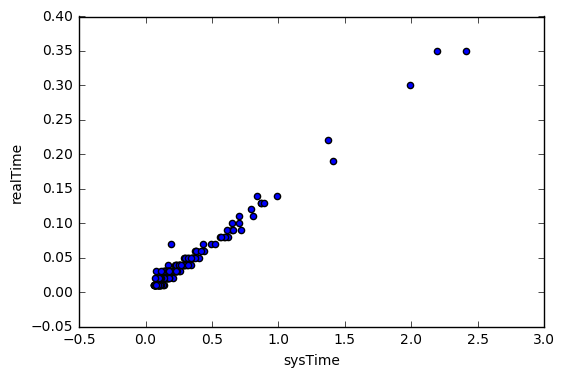

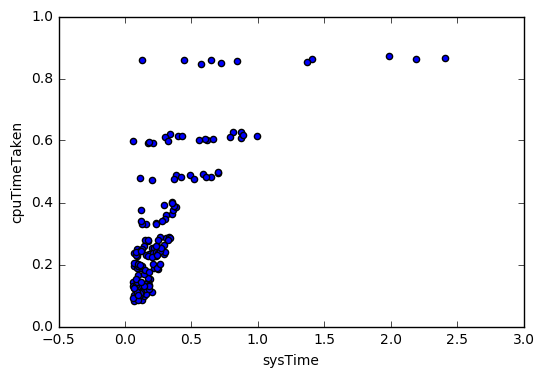

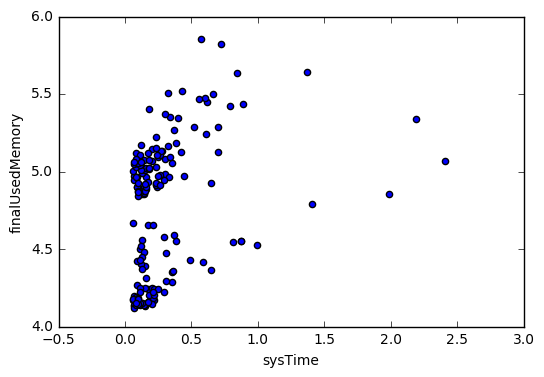

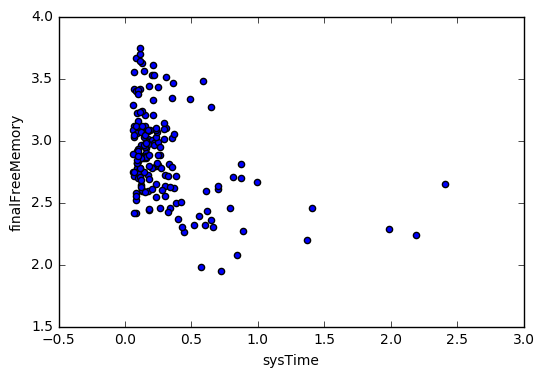

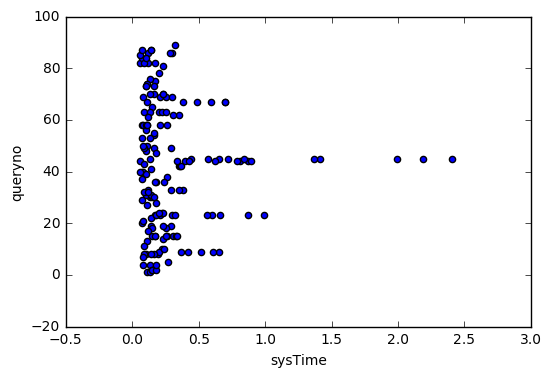

In [50]:
for i in featuresPlot2:
    plt.scatter(gc['userTime'],gc[i])
    plt.xlabel('sysTime')
    plt.ylabel(i)
    plt.show()

In [51]:
gc.keys()

Index(['queryno', 'initialUsedMemory', 'initialFreeMemory', 'gcRun',
       'gcInitialMemory', 'gcFinalMemory', 'gcTotalMemory', 'userTime',
       'sysTime', 'realTime', 'cpuTimeTaken', 'finalUsedMemory',
       'finalFreeMemory'],
      dtype='object')

In [53]:
tok1=gc[gc['queryno']==1]

In [55]:
tok1.keys()

Index(['queryno', 'initialUsedMemory', 'initialFreeMemory', 'gcRun',
       'gcInitialMemory', 'gcFinalMemory', 'gcTotalMemory', 'userTime',
       'sysTime', 'realTime', 'cpuTimeTaken', 'finalUsedMemory',
       'finalFreeMemory'],
      dtype='object')